In [102]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf 

In [103]:
startups = pd.read_csv("50_Startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [104]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [105]:
startups.isna().sum() # null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [106]:
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


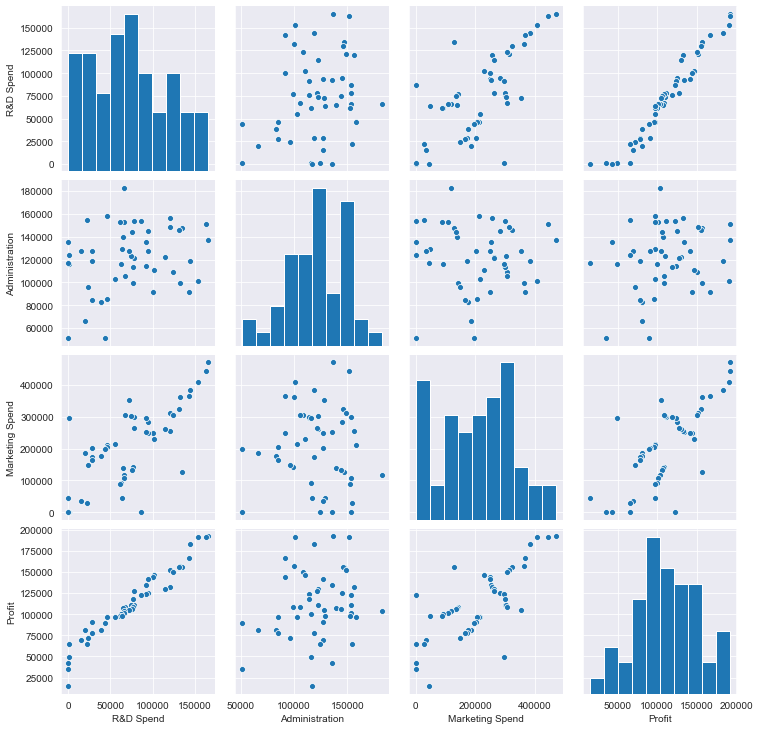

In [107]:
# format the plot backgrond and scatterplots for all variables
sns.set_style(style='darkgrid')
sns.pairplot(startups)

In [108]:
startups = startups.rename(columns={'R&D Spend':'RD','Marketing Spend':'Marketing'},inplace = False)
startups


,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# preparing model 

In [109]:
import statsmodels.formula.api as smf
model = smf.ols('Profit~RD+Administration+Marketing+State',data = startups).fit()

In [110]:
# coefficients
model.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
RD                       0.806023
Administration          -0.027004
Marketing                0.026980
dtype: float64

In [111]:
print(model.tvalues)
print(model.pvalues)

Intercept             7.280560
State[T.Florida]      0.058970
State[T.New York]    -0.012864
RD                   17.368580
Administration       -0.517012
Marketing             1.573889
dtype: float64
Intercept            4.444178e-09
State[T.Florida]     9.532429e-01
State[T.New York]    9.897941e-01
RD                   2.578772e-21
Administration       6.077373e-01
Marketing            1.226769e-01
dtype: float64


In [112]:
model.rsquared,model.rsquared_adj

(0.9507524843355148, 0.945156175737278)

In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           1.34e-27
Time:                        11:20:35   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
RD                    0.8060      0.046     17.369      0.000       0.712       0.900
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# simple linear regression models


In [114]:
ml_State = smf.ols('Profit~State',data=startups).fit()
print(ml_State.tvalues)
print(ml_State.pvalues)

Intercept            10.536302
State[T.Florida]      1.049860
State[T.New York]     0.706364
dtype: float64
Intercept            5.774813e-14
State[T.Florida]     2.991510e-01
State[T.New York]    4.834492e-01
dtype: float64


In [115]:
ml_State.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.5748
Date:                Sat, 10 Apr 2021   Prob (F-statistic):              0.567
Time:                        11:20:36   Log-Likelihood:                -600.05
No. Observations:                  50   AIC:                             1206.
Df Residuals:                      47   BIC:                             1212.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.039e+05   9861.636     10.536      0.000    8.41e+04    1.24e+05
State[T.Florida]   1.487e+04   1.42e+04      1.050      0.299   -1.36e+04    4.34e+04
State[T.New York]  9851.2712   1.39e+04      0.706      0.483   -1.82e+04    3.79e+04
==============================================================================
Omnibus:                        0.111   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.207
Skew:                           0.104   Prob(JB):                        0.902
Kurtosis:                       2.762   Cond. No.                         3.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
ml_Ad = smf.ols('Profit~Administration',data =startups).fit()
print(ml_Ad.tvalues)
print(ml_Ad.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64
Intercept         0.003824
Administration    0.162217
dtype: float64


In [117]:
ml_Ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sat, 10 Apr 2021   Prob (F-statistic):              0.162
Time:                        11:20:37   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
ml_mk = smf.ols('Profit~Marketing',data=startups).fit()
print(ml_mk.tvalues)
print(ml_mk.pvalues)

Intercept    7.808356
Marketing    7.802657
dtype: float64
Intercept    4.294735e-10
Marketing    4.381073e-10
dtype: float64


In [119]:
ml_mk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           4.38e-10
Time:                        11:20:38   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 # calculating VIF values 

In [120]:
rsq_RD = smf.ols('RD~Administration+Marketing+State',data=startups).fit().rsquared
vif_RD = 1/(1-rsq_RD)

rsq_Administration = smf.ols('Administration~RD+Marketing+State',data=startups).fit().rsquared
vif_Administration = 1/(1-rsq_Administration)

rsq_Marketing = smf.ols('Marketing~RD+Administration+State',data = startups).fit().rsquared
vif_Marketing = 1/(1-rsq_Marketing)

#rsq_State = smf.ols('State~RD+Administration+Marketing',data = startups).fit().rsquared
#vif_State = 1/(1-rsq_State)

d1 ={'variables':['RD','Administration','Marketing'],'VIF':[vif_RD,vif_Administration,vif_Marketing]}
vif_frame=pd.DataFrame(d1)
vif_frame

,variables,VIF
0,RD,2.495511
1,Administration,1.177766
2,Marketing,2.416797


# Residual analysis


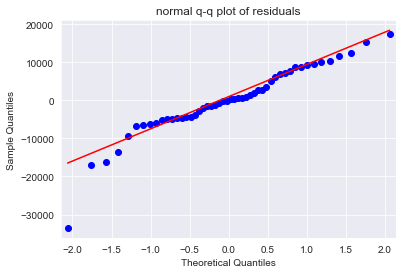

In [121]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line = 'q')
plt.title('normal q-q plot of residuals')
plt.show()

In [122]:
list(np.where(model.resid>5))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

# residual plot for Homoscedasticity 

In [123]:
def get_standarized_values(vals):
    return (vals-vals.mean())/vals.std()

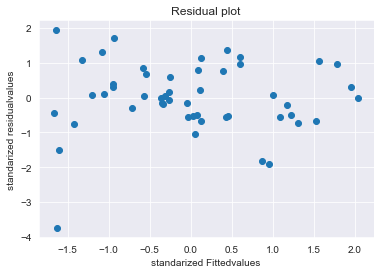

In [124]:
plt.scatter(get_standarized_values(model.fittedvalues),get_standarized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('standarized Fittedvalues')
plt.ylabel('standarized residualvalues')
plt.show()

# Residuals vs regressors


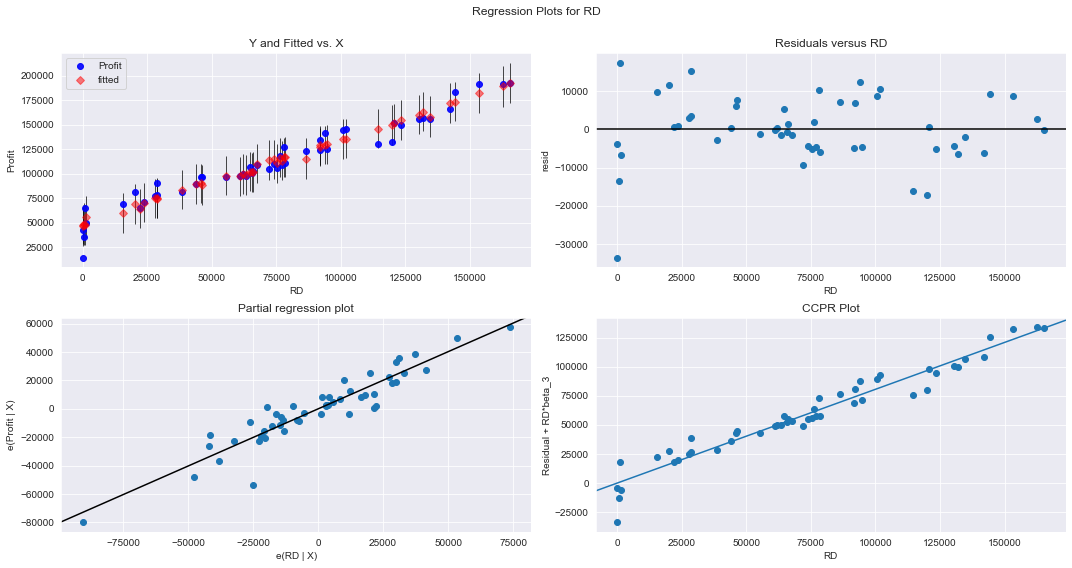

In [125]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"RD",fig = fig)
plt.show()

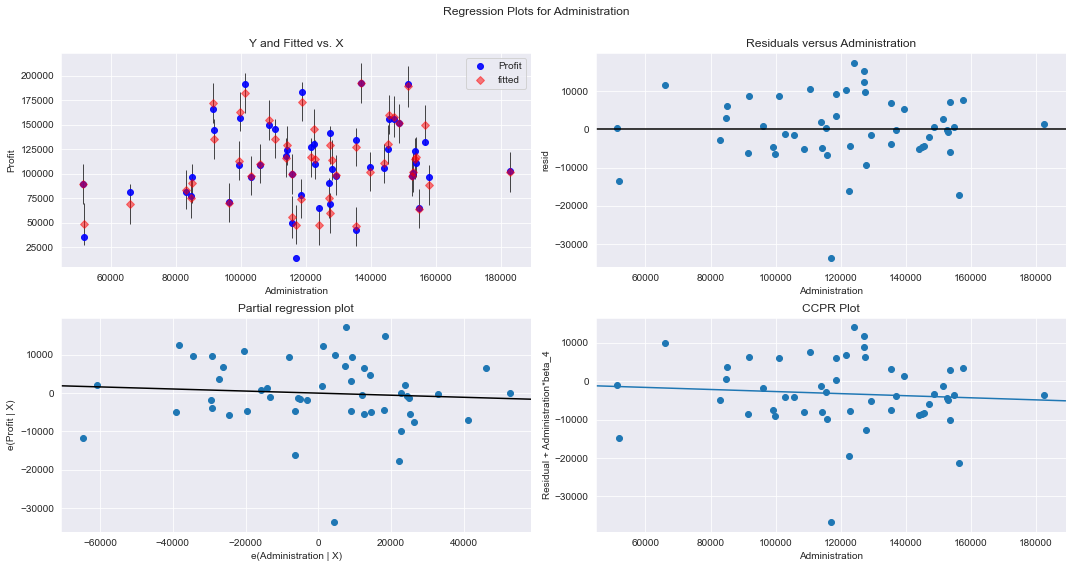

In [126]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Administration",fig = fig)
plt.show()

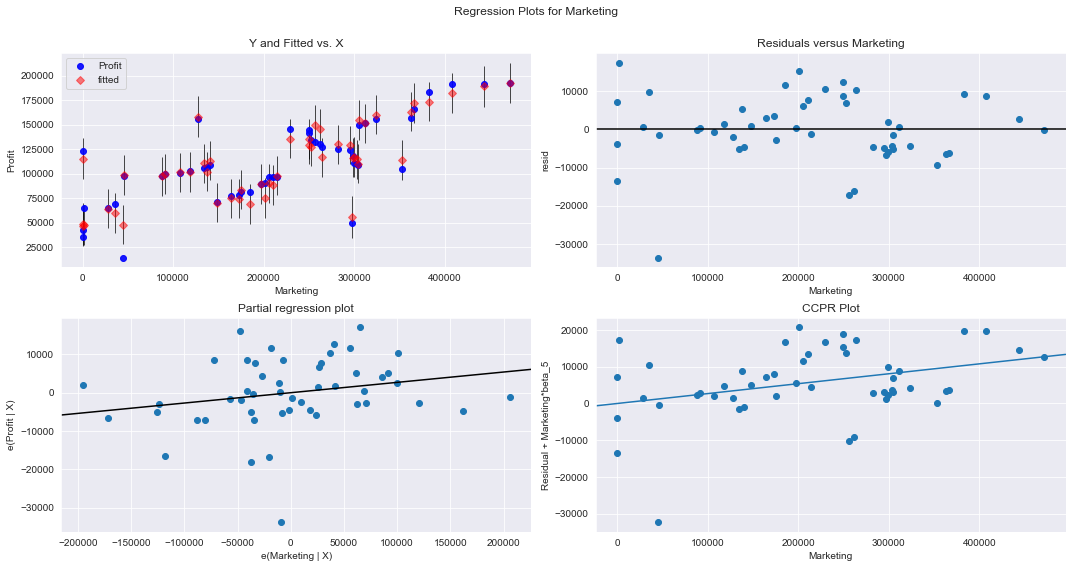

In [127]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Marketing",fig = fig)
plt.show()

# model deletion diagnostics 

# detecting influencers / outliers

In [128]:
# cooks distance
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

<ipython-input-129-2cc5c3cd2f84>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startups)),np.round(c,3))


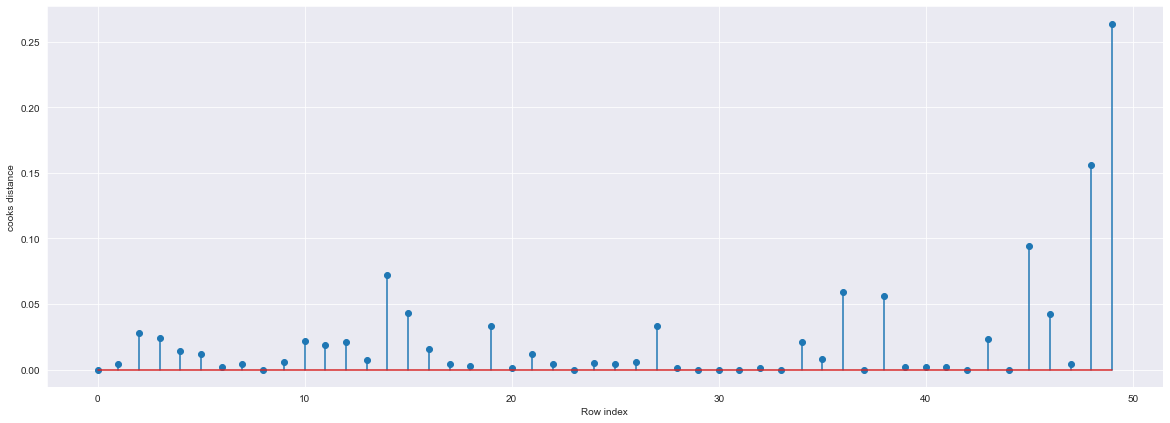

In [129]:
# plot the influencers values using stemplot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startups)),np.round(c,3))
plt.xlabel("Row index")
plt.ylabel("cooks distance")
plt.show()

In [130]:
# index and value of influence  where c is more than .5
np.argmax(c),np.max(c)

(49, 0.2639594358692202)

# high influence plots

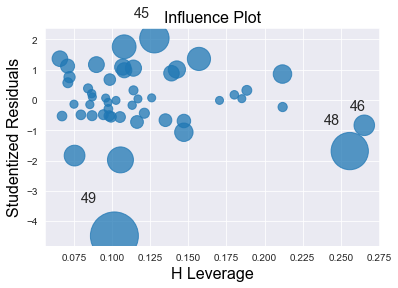

In [131]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [132]:
k = startups.shape[1]
n = startups.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.36

In [133]:
startups[startups.index.isin([45,48,49])]

,RD,Administration,Marketing,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


# improving model


In [145]:

startups1=startups.drop(startups.index[[45,48,49]],axis = 0).reset_index()

In [146]:
startups1

,index,RD,Administration,Marketing,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [147]:
startups1 = startups1.drop(['index'],axis = 1)
startups1

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96



# Building model 

In [148]:
final_ml_p= smf.ols('Profit~RD+Administration+Marketing+State',data = startups).fit()
final_ml_p.rsquared,final_ml_p.aic

(0.9507524843355148, 1062.764909597834)

In [149]:
#cooks distance
model_influence_P = final_ml_p.get_influence()
(c_p,_)= model_influence_P.cooks_distance

<ipython-input-150-ab7aff78c80b>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startups1)),np.round(c_p,3))


ValueError: x and y must have same first dimension, but have shapes (47,) and (50,)

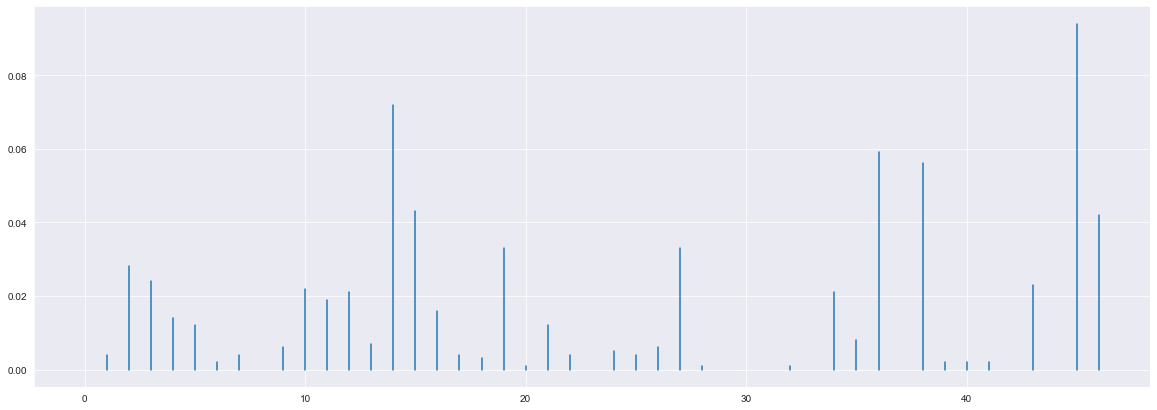

In [150]:
#stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startups1)),np.round(c_p,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [151]:
# index points
np.argmax(c_p),np.max(c_p)

(49, 0.2639594358692202)

since the value < 0.1, we can stop the diagnostic process and finalize the model.

In [152]:
# accuracy of the mode 
final_ml_p =smf.ols('Profit~RD+Administration+Marketing+State',data=startups1).fit()

In [153]:
final_ml_p.rsquared,final_ml_p.aic

(0.9645358420492033, 974.7222227044033)

#  predicting for new data

In [155]:
new_data = pd.DataFrame({'RD':101913.08,'Administration':110594.11,'Marketing':229160.95,'State':'Florida','Profit':146121.95
},index = [1])

In [156]:
final_ml_p.predict(new_data)

1    135938.694122
dtype: float64

In [157]:
final_ml_p.predict(startups.iloc[0:5])

0    189612.190337
1    187754.858009
2    181343.159890
3    172141.698023
4    172027.591446
dtype: float64

In [158]:
pred_y = final_ml_p.predict(startups)
pred_y

0     189612.190337
1     187754.858009
2     181343.159890
3     172141.698023
4     172027.591446
5     162914.576111
6     159002.548271
7     158415.318613
8     149809.696818
9     156152.365607
10    135938.694122
11    137967.828441
12    128948.239151
13    128447.695371
14    148064.041298
15    145553.394221
16    118417.826543
17    128807.534176
18    129028.571041
19    115717.521857
20    118220.782782
21    115690.940426
22    114547.143644
23    110475.358027
24    114563.514376
25    104002.566382
26    110699.459877
27    113412.564963
28    100620.390203
29    101458.575112
30    100913.142026
31     97518.206169
32    101678.552747
33     99137.426922
34     89924.701140
35     92114.684585
36     76023.451848
37     94263.513721
38     72325.296605
39     87468.399324
40     77441.734937
41     77218.993826
42     74210.408935
43     61619.706221
44     66912.992255
45     49553.752888
46     56983.408059
47     49839.805532
48     53576.730536
49     51929.512128


#  rsquared values of models 


In [159]:
model.rsquared

0.9507524843355148

In [160]:
ml_Ad.rsquared

0.04028714077757245

In [161]:
ml_mk.rsquared

0.5591535746115515

In [163]:
ml_State.rsquared

0.023875218249123753

In [164]:
rsq_Administration

0.15093494226942217

In [165]:
rsq_Marketing

0.5862291699815614

In [166]:
rsq_RD

0.5992804554110676

In [167]:
final_ml_p.rsquared

0.9645358420492033